# Initial Sequential NN PyTorch modeling

In [76]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Import torchmetrics
import torchmetrics

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 1.12.1
torchvision version: 0.13.1


## Path setup

Define dataset of interest

In [45]:
dataset = 'Data_CMC_MEL_1'

Walk through image directory

In [46]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [47]:
image_path = '/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/'+dataset
walk_through_dir(image_path)

There are 2 directories and 0 images in '/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1'.
There are 2 directories and 1 images in '/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1/test'.
There are 0 directories and 3292 images in '/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1/test/Mitosis'.
There are 0 directories and 7036 images in '/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1/test/Nonmitosis'.
There are 2 directories and 0 images in '/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1/train'.
There are 0 directories and 10050 images in '/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-gi

Setup train and test paths

In [48]:
train_dir = image_path+'/train'
test_dir = image_path+'/test'

train_dir, test_dir

('/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1/train',
 '/Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1/test')

## PyTorch data setup

### Setup PyTorch Dataset object

Define data transform

In [49]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    #transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    #transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

Load train and test data using ImageFolder

In [50]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)                

In [51]:
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 29539
    Root location: /Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1/train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 10328
    Root location: /Users/gsowell/Desktop/Research/Fourthbrain/Capstone/samsung-capstone/assignments/week-7-initial-github/Data_CMC_MEL_1/test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


### Check out PyTorch Datasets

In [52]:
class_names = train_data.classes
class_names

['Mitosis', 'Nonmitosis']

In [53]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'Mitosis': 0, 'Nonmitosis': 1}

In [54]:
# Check the lengths
len(train_data), len(test_data)

(29539, 10328)

In [55]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.6824, 0.6706, 0.6706,  ..., 0.8118, 0.6980, 0.5647],
         [0.6745, 0.6353, 0.6000,  ..., 0.7412, 0.6353, 0.5176],
         [0.6706, 0.6078, 0.5373,  ..., 0.6392, 0.5608, 0.4784],
         ...,
         [0.8078, 0.7961, 0.8039,  ..., 0.9020, 0.9373, 0.9686],
         [0.8353, 0.8353, 0.8353,  ..., 0.8431, 0.9020, 0.9725],
         [0.8588, 0.8275, 0.8353,  ..., 0.7529, 0.8667, 1.0000]],

        [[0.3490, 0.3490, 0.3451,  ..., 0.6000, 0.4706, 0.3059],
         [0.3569, 0.3412, 0.2980,  ..., 0.5569, 0.4314, 0.2706],
         [0.3725, 0.3412, 0.2667,  ..., 0.4824, 0.3765, 0.2471],
         ...,
         [0.5961, 0.5804, 0.5882,  ..., 0.7804, 0.8039, 0.8118],
         [0.6235, 0.6196, 0.6118,  ..., 0.6275, 0.6863, 0.7529],
         [0.6471, 0.6118, 0.6196,  ..., 0.5529, 0.6706, 0.8118]],

        [[0.4667, 0.4431, 0.4627,  ..., 0.7373, 0.6039, 0.4392],
         [0.4980, 0.4549, 0.4275,  ..., 0.6941, 0.5686, 0.4078],
         [0.5373, 0.4863, 0.4118,  ..., 0.62

Original shape: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute shape: torch.Size([128, 128, 3]) -> [height, width, color_channels]


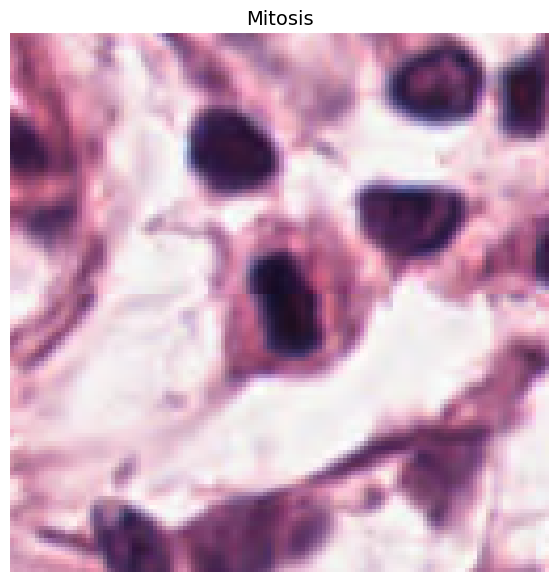

In [56]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

### Create PyTorch DataLoader

Define number of workers and batch size

In [57]:
num_workers = os.cpu_count() # set number of workers to number of CPUs on local machine
batch_size = 64

Create dataloader iterable objects

In [58]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=batch_size, # how many samples per batch?
                              num_workers=num_workers, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=batch_size, 
                             num_workers=num_workers, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8e10107dc0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8e10107c10>)

In [60]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([64, 3, 128, 128]), torch.Size([64]))

In [61]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
#print(x)
#print(output)

Shape before flattening: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Shape after flattening: torch.Size([3, 16384]) -> [color_channels, height*width]


In [143]:
output[0].shape

torch.Size([16384])

## Baseline modeling

### PyTorch build neural network

https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html

Check device type

In [128]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


Define hyperparameters

In [190]:
num_epochs = 5
hidden_units = 512
num_classes = 2
batch_size = 64
num_workers = os.cpu_count() # number of CPUs on local machine
learning_rate = 0.1

Setup dataloaders

In [191]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=batch_size, # how many samples per batch?
                              num_workers=num_workers, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=batch_size, 
                             num_workers=num_workers, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f8de967b640>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8de967b3d0>)

Define neural network class

In [192]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [193]:
model_0 = NeuralNetwork(3*128*128, hidden_units, num_classes).to(device)
print(model_0)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=49152, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
)


### Model training

Initialize loss function and optimizer

In [194]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=learning_rate)

Define training and test loops

In [195]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Train the model

In [196]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model_0, loss_fn, optimizer)
    test_loop(test_dataloader, model_0, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.707214  [    0/29539]
loss: 0.664605  [ 6400/29539]
loss: 0.678467  [12800/29539]
loss: 0.562290  [19200/29539]
loss: 0.643496  [25600/29539]
Test Error: 
 Accuracy: 68.1%, Avg loss: 0.625335 

Epoch 2
-------------------------------
loss: 0.588575  [    0/29539]
loss: 0.653346  [ 6400/29539]
loss: 0.622569  [12800/29539]
loss: 0.632886  [19200/29539]
loss: 0.661566  [25600/29539]
Test Error: 
 Accuracy: 68.1%, Avg loss: 0.627546 

Epoch 3
-------------------------------
loss: 0.662770  [    0/29539]
loss: 0.632843  [ 6400/29539]
loss: 0.627226  [12800/29539]
loss: 0.632943  [19200/29539]
loss: 0.588713  [25600/29539]
Test Error: 
 Accuracy: 68.1%, Avg loss: 0.625252 

Epoch 4
-------------------------------
loss: 0.644022  [    0/29539]
loss: 0.623944  [ 6400/29539]
loss: 0.643516  [12800/29539]
loss: 0.632849  [19200/29539]
loss: 0.643523  [25600/29539]
Test Error: 
 Accuracy: 68.1%, Avg loss: 0.626332 

Epoch 5
------------------------

Save model and weights

In [199]:
torch.save(model_0, 'models/initial_model0.pth')
torch.save(model_0.state_dict(), 'models/model0_weights.pth' )

Look at evaluation metrics

In [230]:
accuracy = torchmetrics.Accuracy()
F1_score = torchmetrics.F1Score(num_classes=2)
prec = torchmetrics.Precision()
rec = torchmetrics.Recall()

In [231]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               precision_fn,
               recall_fn,
               F1_score_fn):
    
    loss, acc, F1, precision, recall = 0, 0, 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy(y_pred.argmax(dim=1), y).item()*100
            F1 += F1_score(y_pred.argmax(dim=1), y).item()
            precision += prec(y_pred.argmax(dim=1), y).item()
            recall += rec(y_pred.argmax(dim=1), y).item()
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        F1 /= len(data_loader)
        precision /= len(data_loader)
        recall /= len(data_loader)
    
    model_dict = {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc,
            "F1 score": F1,
            "Precision": precision,
            "Recall": recall}
    return model_dict

In [232]:
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy, precision_fn=prec, recall_fn=rec, F1_score_fn=F1_score)

In [233]:
model_0_results

{'model_name': 'NeuralNetwork',
 'model_loss': 0.6257274746894836,
 'model_acc': 68.24845679012346,
 'F1 score': 0.6824845679012346,
 'Precision': 0.6824845679012346,
 'Recall': 0.6824845679012346}

### Model tests before training

In [163]:
input_image = train_features_batch
input_image.size()

torch.Size([64, 3, 128, 128])

In [157]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([64, 49152])


In [159]:
layer1 = nn.Linear(in_features=3*128*128, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([64, 20])


In [160]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2893, -0.4115,  0.0283,  ..., -0.0026,  0.0561, -0.5426],
        [ 0.1996, -0.2444,  0.2364,  ..., -0.1483,  0.0441, -0.3085],
        [ 0.2384, -0.3369,  0.1180,  ..., -0.2305, -0.0061, -0.3462],
        ...,
        [ 0.2334, -0.1929,  0.2360,  ..., -0.0267,  0.0884, -0.3787],
        [ 0.1022, -0.1235,  0.0047,  ..., -0.0255,  0.2433, -0.2179],
        [ 0.3738, -0.1837,  0.0552,  ..., -0.1192, -0.0010, -0.4451]],
       grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2893, 0.0000, 0.0283,  ..., 0.0000, 0.0561, 0.0000],
        [0.1996, 0.0000, 0.2364,  ..., 0.0000, 0.0441, 0.0000],
        [0.2384, 0.0000, 0.1180,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2334, 0.0000, 0.2360,  ..., 0.0000, 0.0884, 0.0000],
        [0.1022, 0.0000, 0.0047,  ..., 0.0000, 0.2433, 0.0000],
        [0.3738, 0.0000, 0.0552,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)


In [168]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 2)
)

logits = seq_modules(input_image)

In [169]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab.argmax(dim=1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [172]:
print(f"Model structure: {model_0}\n\n")

for name, param in model_0.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=49152, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=2, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([10, 49152]) | Values : tensor([[ 2.5526e-03, -3.9133e-03, -4.2809e-03,  ...,  3.2100e-03,
          3.5718e-03, -8.7638e-05],
        [ 2.8482e-03,  1.5578e-03, -2.1052e-03,  ..., -3.8265e-03,
         -2.7154e-03, -2.4858e-04]], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([10]) | Values : tensor([-0.0033,  0.0032], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([10, 10]) | Values : tensor([[-0.1434, -0.0982,  0.0709,  0.2429,  0.2009,  0.1902, -0.0711, -0.0935,
         -0.1812, -0.2778],
        [ 0.2880,  0.0418,  0.2702,  0.0986,  0